In [0]:
import pandas as pd

In [0]:
import pandas_datareader as pdr

In [0]:
import datetime 

In [0]:
import matplotlib.pyplot as plt

In [0]:
# 导入apple公司股票数据
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [15]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.283074
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.186352
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.347562
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.279355
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.203714
...,...,...,...,...,...,...
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,50.015266
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.412094
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,49.929707


In [0]:
import numpy as np

In [0]:
# 将aapl数据框中`Adj Close`列数据赋值给变量`daily_close`
daily_close = aapl[['Adj Close']]

In [18]:
daily_close

,Adj Close
Date,
2006-10-02,9.283074
2006-10-03,9.186352
2006-10-04,9.347562
2006-10-05,9.279355
2006-10-06,9.203714
...,...
2011-12-23,50.015266
2011-12-27,50.412094
2011-12-28,49.929707


In [0]:
# 计算每日收益率
daily_pct_change = daily_close.pct_change()

In [20]:
daily_pct_change

,Adj Close
Date,
2006-10-02,NaN
2006-10-03,-0.010419
2006-10-04,0.017549
2006-10-05,-0.007297
2006-10-06,-0.008152
...,...
2011-12-23,0.011993
2011-12-27,0.007934
2011-12-28,-0.009569


In [0]:
# 用0填补缺失值NA
daily_pct_change.fillna(0, inplace=True)

In [22]:
daily_pct_change
# 输出每日收益率的前几行
# print(daily_pct_change.head())

,Adj Close
Date,
2006-10-02,0.000000
2006-10-03,-0.010419
2006-10-04,0.017549
2006-10-05,-0.007297
2006-10-06,-0.008152
...,...
2011-12-23,0.011993
2011-12-27,0.007934
2011-12-28,-0.009569


            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152


In [0]:
# 计算每日对数收益率
daily_log_returns = np.log(daily_close.pct_change()+1)

In [25]:
daily_log_returns

,Adj Close
Date,
2006-10-02,NaN
2006-10-03,-0.010474
2006-10-04,0.017397
2006-10-05,-0.007323
2006-10-06,-0.008185
...,...
2011-12-23,0.011922
2011-12-27,0.007903
2011-12-28,-0.009615


In [26]:
# 查看每日对数收益率的前几行
print(daily_log_returns.head())

# 按月对 `aapl` 数据进行重采样，取每月最后一项
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# 计算每月的百分比变化，并输出前几行
# print(monthly.pct_change().head())

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017397
2006-10-05  -0.007323
2006-10-06  -0.008185


In [0]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

In [31]:
print(all_data.head())

                        High        Low  ...       Volume  Adj Close
Ticker Date                              ...                        
AAPL   2006-10-02  10.838572  10.614285  ...  178159800.0   9.283074
       2006-10-03  10.707143  10.455714  ...  197677200.0   9.186352
       2006-10-04  10.780000  10.451428  ...  207270700.0   9.347562
       2006-10-05  10.880000  10.590000  ...  170970800.0   9.279355
       2006-10-06  10.720000  10.544286  ...  116739700.0   9.203714

[5 rows x 6 columns]


In [0]:
# 选取调整的收盘价 
adj_close_px = aapl['Adj Close']

In [35]:
adj_close_px

Date
2006-10-02     9.283074
2006-10-03     9.186352
2006-10-04     9.347562
2006-10-05     9.279355
2006-10-06     9.203714
                ...    
2011-12-23    50.015266
2011-12-27    50.412094
2011-12-28    49.929707
2011-12-29    50.237251
2011-12-30    50.222366
Name: Adj Close, Length: 1323, dtype: float64

In [0]:
# 计算移动均值
moving_avg = adj_close_px.rolling(window=252).mean()

In [39]:
moving_avg

Date
2006-10-02          NaN
2006-10-03          NaN
2006-10-04          NaN
2006-10-05          NaN
2006-10-06          NaN
                ...    
2011-12-23    44.980055
2011-12-27    45.019943
2011-12-28    45.058006
2011-12-29    45.098091
2011-12-30    45.138659
Name: Adj Close, Length: 1323, dtype: float64

In [40]:
# 查看后十项结果
print(moving_avg[-10:])

Date
2011-12-16    44.804557
2011-12-19    44.834082
2011-12-20    44.869389
2011-12-21    44.904470
2011-12-22    44.941352
2011-12-23    44.980055
2011-12-27    45.019943
2011-12-28    45.058006
2011-12-29    45.098091
2011-12-30    45.138659
Name: Adj Close, dtype: float64


In [0]:
# 短期的移动窗口
aapl['257'] = adj_close_px.rolling(window=257).mean()

In [0]:
# 长期的移动窗口
aapl['457'] = adj_close_px.rolling(window=457).mean()

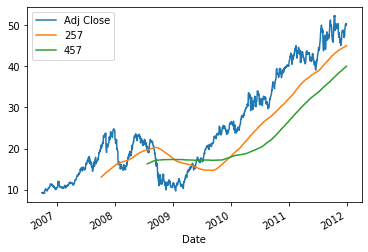

In [49]:
# 绘制调整的收盘价，同时包含短期和长期的移动窗口均值
aapl[['Adj Close', '257', '457']].plot()

In [0]:
# 显示绘图结果
plt.show()